In [127]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 10, 5
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


import pandas as pd

# Chap.2 : *What is statistical learning?*

## The `advertising` dataset

First, we load the dataset, and we separate the *target* from the *features*:

In [65]:
df_adv = pd.read_csv("../data/Advertising.csv")
# Define the output variable:
y = df_adv["Sales"].values
# Define the features:
label_adv = ["TV", "Radio","Newspaper"]
X = df_adv[label_adv].values


# Split train/test data:
#data_adv = np.column_stack((X,y))
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We then fit a linear regression model on each feature using scikit-learn:

In [64]:
theta = []
theta_0 = []
for d in range(X.shape[1]):
    reg_adv = LinearRegression()
    reg_adv.fit(X[:,d].reshape(-1,1), y) # reshape kills DeprecateWarning
    theta.append(reg_adv.coef_)
    theta_0.append(reg_adv.intercept_)

Finally, we plot the data (in red) and the values predicted by the linear model (in blue). See **figure 2.1** in the book for similar results.

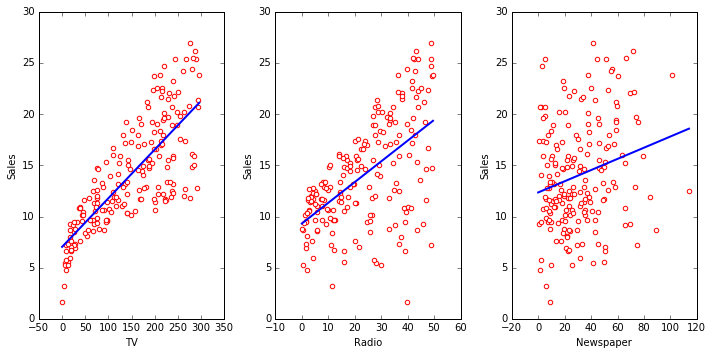

In [70]:
f, (ax1, ax2, ax3) = plt.subplots(1,3)
for i, ax in enumerate([ax1, ax2, ax3]):
    x_axis = np.linspace(0,np.max(X[:,i]), 200)
    ax.scatter(X[:,i], y, facecolors='white', edgecolors='r')
    ax.plot(x_axis, theta_0[i] + theta[i]*x_axis, lw=2)
    ax.set_xlabel(label_adv[i])
    ax.set_ylabel("Sales")
f.tight_layout()


## Assessing model accuracy

### Measuring the quality of fit

In the regression setting, the most-commonly used measure is the *mean squared error* (MSE).

In [237]:
from sklearn.metrics import mean_squared_error

Let's try and reproduce a similar result as the one presented in **figure 2.9**. First we define our `f` model as a sine function. We simulate the data by adding some noise:

In [97]:
def f_model_sim(x):
    return np.sin(x) + 0.3*np.random.randn(x.shape[0])

In [197]:
X = np.linspace(-pi/2,pi,100)
y = f_model_sim(X)

Next, we split the data in two parts: the training set, and the test set.

In [250]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In order to train our model, we do not have the magic `poly` function that exists in R, but we can use scikit-learn instead. The training process first transforms the data using the `PolynomialFeatures` method, the result is then passed into a `LinearRegression` object through a `Pipeline`. The following code tries to reproduce the results from **figure 2.9**:

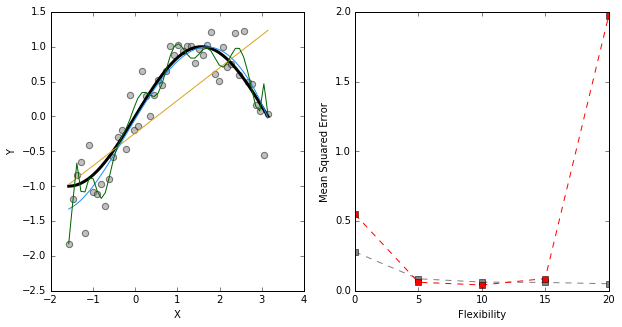

In [291]:

colors = {1:'goldenrod',4:'dodgerblue',20:'darkgreen'}
f, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(X, np.sin(X), lw=3, color='k')
ax1.scatter(X, y, facecolor='grey', alpha=0.5, s=40)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')

mse_train = []
mse_test = []
yhat_plot = np.zeros((100,3))
deg_range = range(1,23)

for i, deg in enumerate(deg_range):
    regpol = make_pipeline(PolynomialFeatures(deg), LinearRegression())
    regpol.fit(X_train[:,np.newaxis], y_train)
    if deg in colors.keys():
        ax1.plot(X, regpol.predict(X[:,np.newaxis]), color=colors[deg])
    yhat_train = regpol.predict(X_train[:,np.newaxis])
    yhat_test = regpol.predict(X_test[:,np.newaxis])
    mse_train.append(mean_squared_error(yhat_train, y_train))
    mse_test.append(mean_squared_error(yhat_test, y_test))


mse_pts = [0, 5, 10, 15, 20]
mse_train_plot = [mse_train[i] for i in mse_pts]
mse_test_plot = [mse_test[i] for i in mse_pts]
ax2.plot(mse_pts,mse_train_plot, '--s', color='grey')
ax2.plot(mse_pts,mse_test_plot, '--s', color='red')
ax2.set_xlabel('Flexibility')
ax2.set_ylabel('Mean Squared Error')

    





## The classification setting